# 三、pandas

## 1.Series 

### 1.1 Series的创建

In [193]:
import pandas as pd 
import numpy as np 

In [194]:
s1 = pd.Series(np.random.randint(10,80,10))

In [195]:
s1

0    17
1    26
2    71
3    37
4    25
5    54
6    14
7    16
8    43
9    27
dtype: int32

In [196]:
pd.Series([11,22,33,44,55],index=[1,2,3,4,5])

1    11
2    22
3    33
4    44
5    55
dtype: int64

In [197]:
s2 = pd.Series({'r':123,'b':456,'g':789})
s2

r    123
b    456
g    789
dtype: int64

### 1.2 Series的属性

In [198]:
s2.index

Index(['r', 'b', 'g'], dtype='object')

In [199]:
s2.values

array([123, 456, 789])

In [200]:
s2[1] #不推荐使用即将被弃用

C:\Users\24827\AppData\Local\Temp\ipykernel_25740\3686289156.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s2[1] #不推荐使用即将被弃用


np.int64(456)

In [201]:
s2['b']

np.int64(456)

## 2.DataFrame

### 2.1 DataFrame的创建

In [202]:
d1 = pd.DataFrame(np.random.randint(10,100,[5,3]))
d1

,0,1,2
0,34,15,69
1,15,73,92
2,57,38,55
3,74,22,38
4,31,98,35


In [203]:
stu = ["学生"+str(i) for i in range(d1.shape[0])]
stu

['学生0', '学生1', '学生2', '学生3', '学生4']

In [204]:
core = ["语文","数学","英语"]
core

['语文', '数学', '英语']

In [205]:
d2 = pd.DataFrame(np.random.randint(10,100,[5,3]),columns=core,index=stu)
d2

,语文,数学,英语
学生0,64,30,19
学生1,13,78,99
学生2,10,97,43
学生3,66,99,38
学生4,15,66,20


### 2.2 DataFrame的属性

In [206]:
d2.shape

(5, 3)

In [207]:
d2.index

Index(['学生0', '学生1', '学生2', '学生3', '学生4'], dtype='object')

In [208]:
d2.columns

Index(['语文', '数学', '英语'], dtype='object')

In [209]:
d2.values

array([[64, 30, 19],
       [13, 78, 99],
       [10, 97, 43],
       [66, 99, 38],
       [15, 66, 20]], dtype=int32)

In [210]:
d2.T

,学生0,学生1,学生2,学生3,学生4
语文,64,13,10,66,15
数学,30,78,97,99,66
英语,19,99,43,38,20


In [211]:
d2.head(2)

,语文,数学,英语
学生0,64,30,19
学生1,13,78,99


In [212]:
d2.tail(2)

,语文,数学,英语
学生3,66,99,38
学生4,15,66,20


In [213]:
new_stu = ["学生_"+str(i) for i in range(d2.shape[0])]
new_stu

['学生_0', '学生_1', '学生_2', '学生_3', '学生_4']

In [214]:
d2.index = new_stu

In [215]:
d2

,语文,数学,英语
学生_0,64,30,19
学生_1,13,78,99
学生_2,10,97,43
学生_3,66,99,38
学生_4,15,66,20


In [216]:
d3 = d2.reset_index()
d3

,index,语文,数学,英语
0,学生_0,64,30,19
1,学生_1,13,78,99
2,学生_2,10,97,43
3,学生_3,66,99,38
4,学生_4,15,66,20


In [217]:
d3.index

RangeIndex(start=0, stop=5, step=1)

In [218]:
d3.columns

Index(['index', '语文', '数学', '英语'], dtype='object')

In [219]:
d2.reset_index(drop=True)

,语文,数学,英语
0,64,30,19
1,13,78,99
2,10,97,43
3,66,99,38
4,15,66,20


In [220]:
d4 = pd.DataFrame({"month":[1,2,3,4],"year":[2022,2023,2024,2025],"day":[23,24,25,26]})
d4

,month,year,day
0,1,2022,23
1,2,2023,24
2,3,2024,25
3,4,2025,26


In [221]:
d5 = d4.set_index("year")
d5

,month,day
year,,
2022,1,23
2023,2,24
2024,3,25
2025,4,26


In [222]:
d5.index

Index([2022, 2023, 2024, 2025], dtype='int64', name='year')

In [223]:
d6 = d4.set_index(["year","month"])
d6

,,day
year,month,
2022,1,23
2023,2,24
2024,3,25
2025,4,26


In [224]:
d6.index

MultiIndex([(2022, 1),
            (2023, 2),
            (2024, 3),
            (2025, 4)],
           names=['year', 'month'])

## 3.MultiIndex

In [225]:
d6

,,day
year,month,
2022,1,23
2023,2,24
2024,3,25
2025,4,26


In [226]:
d6.index

MultiIndex([(2022, 1),
            (2023, 2),
            (2024, 3),
            (2025, 4)],
           names=['year', 'month'])

## 4.数据处理

### 4.1 基础函数使用

In [227]:
import pandas as pd 
import numpy as np 
import matplotlib as plt 

In [228]:
data = pd.read_csv("./data/stock_day.csv")
data.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58


In [229]:
data = data.drop(["ma5","ma10","ma20","v_ma5","v_ma10","v_ma20"],axis=1)
data.head()

,open,high,close,low,volume,price_change,p_change,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,0.58


### 4.2 数据的索引

In [230]:
data["open"]["2018-02-27"]

np.float64(23.53)

In [231]:
data.loc["2018-02-27","open"]

np.float64(23.53)

In [232]:
data.iloc[0,0]

np.float64(23.53)

In [233]:
data.iloc[:3,:3]

,open,high,close
2018-02-27,23.53,25.88,24.16
2018-02-26,22.80,23.78,23.53
2018-02-23,22.88,23.37,22.82


In [234]:
data.loc[["2018-02-27","2018-02-14"],["open","close"]]

,open,close
2018-02-27,23.53,24.16
2018-02-14,21.49,21.92


In [235]:
data.iloc[:3,data.columns.get_indexer(["open","close"])]

,open,close
2018-02-27,23.53,24.16
2018-02-26,22.80,23.53
2018-02-23,22.88,22.82


In [236]:
data.iloc[:5,[0,2]]

,open,close
2018-02-27,23.53,24.16
2018-02-26,22.80,23.53
2018-02-23,22.88,22.82
2018-02-22,22.25,22.28
2018-02-14,21.49,21.92


### 4.3 数据的排序

In [237]:
data.sort_values(by = "open",ascending=False).head()

,open,high,close,low,volume,price_change,p_change,turnover
2015-06-15,34.99,34.99,31.69,31.69,199369.53,-3.52,-10.00,6.82
2015-06-12,34.69,35.98,35.21,34.01,159825.88,0.82,2.38,5.47
2015-06-10,34.10,36.35,33.85,32.23,269033.12,0.51,1.53,9.21
2017-11-01,33.85,34.34,33.83,33.10,232325.30,-0.61,-1.77,5.81
2015-06-11,33.17,34.98,34.39,32.51,173075.73,0.54,1.59,5.92


In [238]:
data.sort_index().head()

,open,high,close,low,volume,price_change,p_change,turnover
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,3.30
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,4.76
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,2.30
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,3.19
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,6.16


In [239]:
data.sort_values(by = ["open","high"]).head()

,open,high,close,low,volume,price_change,p_change,turnover
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,3.30
2015-09-02,12.30,14.11,12.36,12.30,70201.74,-1.10,-8.17,2.40
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,4.76
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,2.30
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,3.19


In [240]:
tmp = data
tmp["open"] = 1
tmp.head()

,open,high,close,low,volume,price_change,p_change,turnover
2018-02-27,1,25.88,24.16,23.53,95578.03,0.63,2.68,2.39
2018-02-26,1,23.78,23.53,22.80,60985.11,0.69,3.02,1.53
2018-02-23,1,23.37,22.82,22.71,52914.01,0.54,2.42,1.32
2018-02-22,1,22.76,22.28,22.02,36105.01,0.36,1.64,0.90
2018-02-14,1,21.99,21.92,21.48,23331.04,0.44,2.05,0.58


### 4.3 算数运算

In [241]:
tmp.head()

,open,high,close,low,volume,price_change,p_change,turnover
2018-02-27,1,25.88,24.16,23.53,95578.03,0.63,2.68,2.39
2018-02-26,1,23.78,23.53,22.80,60985.11,0.69,3.02,1.53
2018-02-23,1,23.37,22.82,22.71,52914.01,0.54,2.42,1.32
2018-02-22,1,22.76,22.28,22.02,36105.01,0.36,1.64,0.90
2018-02-14,1,21.99,21.92,21.48,23331.04,0.44,2.05,0.58


In [242]:
tmp["open"].add(10).head()

2018-02-27    11
2018-02-26    11
2018-02-23    11
2018-02-22    11
2018-02-14    11
Name: open, dtype: int64

### 4.4 逻辑运算

In [243]:
data = pd.read_csv("./data/stock_day.csv")
data = data.drop(["ma5","ma10","ma20","v_ma5","v_ma10","v_ma20"],axis=1)

In [244]:
data.head()

,open,high,close,low,volume,price_change,p_change,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,0.58


In [245]:
data[data["open"]>22].head()

,open,high,close,low,volume,price_change,p_change,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,0.90
2018-02-07,22.69,23.11,21.80,21.29,53853.25,-0.50,-2.24,1.35


In [246]:
data[(data["open"] > 22) & (data["open"] < 23)].head()

,open,high,close,low,volume,price_change,p_change,turnover
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,0.90
2018-02-07,22.69,23.11,21.80,21.29,53853.25,-0.50,-2.24,1.35
2018-02-06,22.80,23.55,22.29,22.20,55555.00,-0.97,-4.17,1.39


In [247]:
data[data["open"].isin([22.1,22.6])]

,open,high,close,low,volume,price_change,p_change,turnover
2017-08-21,22.6,22.88,22.71,22.14,88234.07,0.31,1.38,2.21
2017-08-04,22.1,22.27,21.49,21.44,88873.78,-0.79,-3.55,2.22
2017-07-28,22.6,23.36,23.01,22.50,100094.83,0.25,1.10,2.51
2016-09-13,22.1,22.30,21.90,21.58,60927.69,-0.03,-0.14,2.09
2016-08-19,22.6,22.60,22.12,21.99,100071.53,-0.57,-2.51,3.43
2015-04-17,22.6,23.97,22.06,21.80,206773.17,-0.91,-3.96,7.08


In [248]:
data.query("open > 22.1 & open < 22.6").head()

,open,high,close,low,volume,price_change,p_change,turnover
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,0.90
2018-02-05,22.45,23.39,23.27,22.25,52341.39,0.65,2.87,1.31
2018-02-02,22.40,22.70,22.62,21.53,33242.11,0.20,0.89,0.83
2018-01-03,22.42,22.83,22.79,22.18,74687.10,0.38,1.70,1.87
2018-01-02,22.30,22.54,22.42,22.05,42677.76,0.12,0.54,1.07


### 4.5 数据统计

In [249]:
data.head()

,open,high,close,low,volume,price_change,p_change,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,0.58


In [250]:
data.describe()

,open,high,close,low,volume,price_change,p_change,turnover
count,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000
mean,21.272706,21.900513,21.336267,20.771835,99905.519114,0.018802,0.190280,2.936190
std,3.930973,4.077578,3.942806,3.791968,73879.119354,0.898476,4.079698,2.079375
min,12.250000,12.670000,12.360000,12.200000,1158.120000,-3.520000,-10.030000,0.040000
25%,19.000000,19.500000,19.045000,18.525000,48533.210000,-0.390000,-1.850000,1.360000
50%,21.440000,21.970000,21.450000,20.980000,83175.930000,0.050000,0.260000,2.500000
75%,23.400000,24.065000,23.415000,22.850000,127580.055000,0.455000,2.305000,3.915000
max,34.990000,36.350000,35.210000,34.010000,501915.410000,3.030000,10.030000,12.560000


In [251]:
data["open"].min()

np.float64(12.25)

In [252]:
data.min(axis=0)

open              12.25
high              12.67
close             12.36
low               12.20
volume          1158.12
price_change      -3.52
p_change         -10.03
turnover           0.04
dtype: float64

In [253]:
data.idxmax()

open            2015-06-15
high            2015-06-10
close           2015-06-12
low             2015-06-12
volume          2017-10-26
price_change    2015-06-09
p_change        2015-08-28
turnover        2017-10-26
dtype: object

In [254]:
data["open"]["2015-06-15"]

np.float64(34.99)

In [255]:
data.max(0)

open                34.99
high                36.35
close               35.21
low                 34.01
volume          501915.41
price_change         3.03
p_change            10.03
turnover            12.56
dtype: float64

In [256]:
data.loc["2015-06-15","open"]

np.float64(34.99)

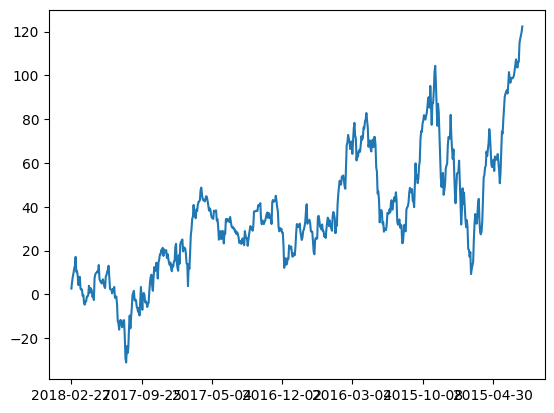

In [259]:
import matplotlib.pyplot as plt
data["p_change"].cumsum().plot()
plt.show()

### 4.6 自定义运算

In [264]:
data[["open"]].apply(lambda x: x-10, axis = 0)

,open
2018-02-27,13.53
2018-02-26,12.80
2018-02-23,12.88
2018-02-22,12.25
2018-02-14,11.49
...,...
2015-03-06,3.17
2015-03-05,2.88
2015-03-04,2.80
2015-03-03,2.52


In [265]:
data[["open","close"]].apply(lambda x: x.max() - x.min())

open     22.74
close    22.85
dtype: float64

### 4.7 读取数据

In [268]:
data = pd.read_csv("./data/stock_day.csv",usecols=["open","close"])
data.head()

,open,close
2018-02-27,23.53,24.16
2018-02-26,22.80,23.53
2018-02-23,22.88,22.82
2018-02-22,22.25,22.28
2018-02-14,21.49,21.92


In [280]:
data.to_csv("./data/test.csv",index=True)

In [285]:
tmp = pd.read_csv("./data/test.csv",index_col=0)
tmp.head()

,open,close
2018-02-27,23.53,24.16
2018-02-26,22.80,23.53
2018-02-23,22.88,22.82
2018-02-22,22.25,22.28
2018-02-14,21.49,21.92


In [290]:
data = pd.read_json("./data/Sarcasm_Headlines_Dataset.json",orient="records",lines=True)
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [292]:
data.to_json("./data/test.json",orient="records",lines=True)

### 4.8 缺失值的处理

#### 4.8.1 缺失值为NAN

In [295]:
data = pd.read_csv("./data/IMDB-Movie-Data.csv")
data

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [296]:
np.all(data.notna())

np.False_

In [306]:
for i in data.columns:
    if np.all(data[i].notna()) != True:
        print(i)
        data[i] = data[i].fillna(data[i].mean())
    

In [307]:
np.all(data.notna())

np.True_

In [308]:
data

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.130000,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.460000,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.120000,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.320000,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.020000,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,82.956376,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.540000,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.010000,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,82.956376,22.0


#### 4.8.2 缺失值为其他

In [ ]:
data = pd.read_csv("")